# StoneHedge prototype notebook

This notebook demonstrates the baseline pipeline: load sample stones with ArUco markers, segment polygons, calibrate to inches, pack into a target polygon, and visualize the layout.

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# Enable module imports from the repo root
repo_root = Path('..').resolve()
sys.path.append(str(repo_root / 'StoneHedge_GPT-5.1-Codex-Max_2025_11_20T17:55'))

from src.pipeline import run_pipeline
from src.visualization import plot_layout


## 1. Run the pipeline
Adjust the parameters below to try different target shapes and areas. `image_limit` controls how many of the provided stone photos are used.

In [2]:
output = run_pipeline(image_limit=4, target_kind='square', target_area_sqft=100.0)
print(f'Loaded {len(output.stones)} stones')
print(f'Coverage: {output.packing.coverage_ratio:.2%} ({output.packing.filled_area_sqft:.1f} sq ft filled)')

Loaded 0 stones
Coverage: 0.00% (0.0 sq ft filled)


## 2. Inspect per-stone calibration and segmentation
Each stone retains its raw image, detected marker, segmentation mask, and polygon coordinates (inches). Replace this quick look with richer QA as needed.

In [3]:
import matplotlib.pyplot as plt
import cv2

for stone in output.stones:
    print(stone.path.name)
    if stone.calibration.marker_corners is not None:
        print('Pixels per inch:', stone.calibration.scale_pixels_per_unit)
    print('Polygon vertices (in):', stone.polygon_inches.exterior.coords[:])
    # Quick visualization of mask overlay
    overlay = cv2.cvtColor(stone.segmentation.mask, cv2.COLOR_GRAY2BGR)
    blended = cv2.addWeighted(stone.raw_image, 0.6, overlay, 0.4, 0)
    plt.figure(figsize=(4,4))
    plt.imshow(cv2.cvtColor(blended, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


## 3. Visualize the packed layout
Rendered in inches with stone labels.

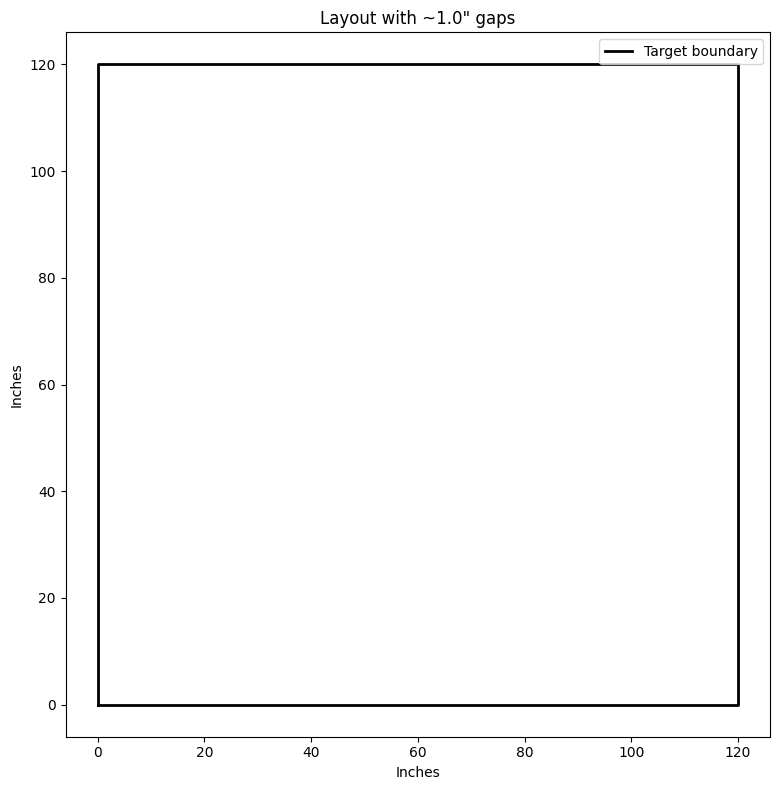

In [4]:
plot_layout(output.target, output.packing.placements, gap_inches=1.0)